<a href="https://colab.research.google.com/github/NagarajaN-Nethi/in/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.model_selection import cross_validate
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dta = sm.datasets.fair.load_pandas().data
#add "affair" column: 1 represents having affairs, 0 represents not 
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  dta, return_type="dataframe")

In [3]:
X = X.rename(columns ={'C(occupation)[T.2.0]':'occ_2','C(occupation)[T.3.0]':'occ_3','C(occupation)[T.4.0]':'occ_4','C(occupation)[T.5.0]':'occ_5','C(occupation)[T.6.0]':'occ_6','C(occupation_husb)[T.2.0]':'occ_husb_2','C(occupation_husb)[T.3.0]':'occ_husb_3','C(occupation_husb)[T.4.0]':'occ_husb_4','C(occupation_husb)[T.5.0]':'occ_husb_5','C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [4]:
y = np.ravel(y)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5092, 17)
(1274, 17)
(5092,)
(1274,)


In [6]:
classifier = LogisticRegression(max_iter=1000)
model = classifier.fit(X_train, y_train)

In [7]:
y_pred = model.predict(X_test)

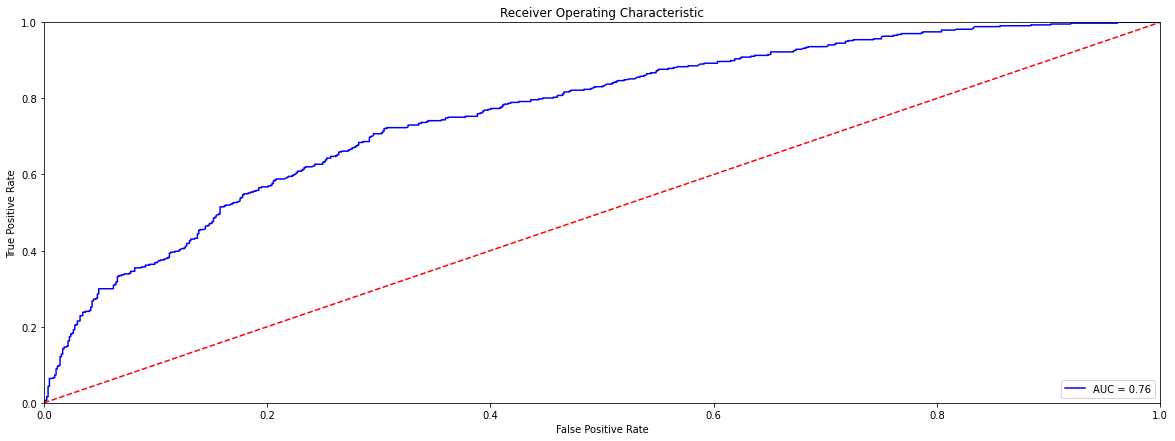

In [8]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

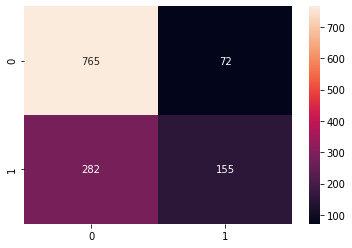

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot = True,
            fmt = 'g')